In [ ]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from PIL import Image
i='/content/drive/MyDrive/idb/LRA/s2.jpeg'
image= Image.open(i)
image= np.array(image)

LRA

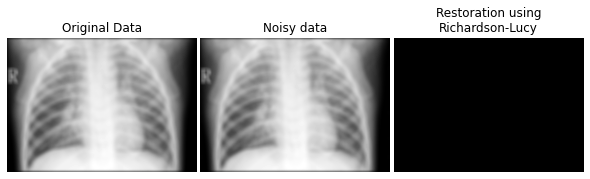

In [ ]:



import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration

rng = np.random.default_rng()
if image.ndim == 3:
    image = color.rgb2gray(image[..., :3])

# image= color.rgb2gray(image)

psf = np.ones((31, 31)) / 31
image = conv2(image, psf, 'same')
# Add Noise to Image
astro_noisy = image.copy()
astro_noisy += (rng.poisson(lam=25, size=image.shape) - 10) / 255.

# Restore Image using Richardson-Lucy algorithm
deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, num_iter=30)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(image)
ax[0].set_title('Original Data')

ax[1].imshow(astro_noisy)
ax[1].set_title('Noisy data')
# 
ax[2].imshow(deconvolved_RL, vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

LRP

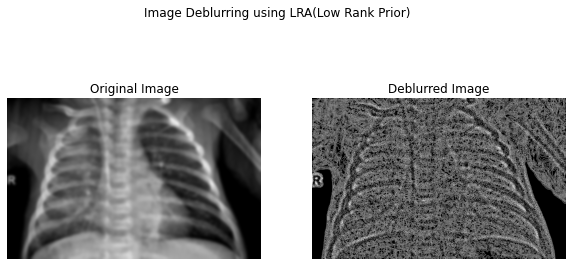

In [ ]:
# import cv2
# import numpy as np

# def deblur_lra(image, kernel_size, num_iterations):
#     # Split the RGB image into its color channels
#     b, g, r = cv2.split(image)

#     # Apply LRA to each color channel
#     b = cv2.Laplacian(b, cv2.CV_64F)
#     g = cv2.Laplacian(g, cv2.CV_64F)
#     r = cv2.Laplacian(r, cv2.CV_64F)

#     # Merge the deblurred color channels back into an RGB image
#     deblurred_image = cv2.merge((b, g, r))

#     return deblurred_image

# # Load the blurred RGB image
# image = cv2.imread('/content/drive/MyDrive/idb/LRA/sample.jpeg')

# # Deblur the image using LRA with kernel size of 5 and 10 iterations
# deblurred_image = deblur_lra(image, 5, 10)

# # Display the original and deblurred images
# cv2.imshow('Original', image)
# cv2.imshow('Deblurred', deblurred_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


#Low Rank Prior


import cv2
import numpy as np
import matplotlib.pyplot as plt

def deblur_lra(image, kernel_size, num_iterations):
    # Split the RGB image into its color channels
    b, g, r = cv2.split(image)

    # Apply LRA to each color channel
    b = cv2.Laplacian(b, cv2.CV_64F)
    g = cv2.Laplacian(g, cv2.CV_64F)
    r = cv2.Laplacian(r, cv2.CV_64F)

    # Merge the deblurred color channels back into an RGB image
    deblurred_image = cv2.merge((b, g, r))

    return deblurred_image

# Load the blurred RGB image
image = cv2.imread('/content/drive/MyDrive/idb/LRA/sample.jpeg')

# Deblur the image using LRA with kernel size of 5 and 10 iterations
deblurred_image = deblur_lra(image, 5, 50)

# Display the original and deblurred images using matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Image Deblurring using LRA(Low Rank Prior)')

ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(cv2.cvtColor(deblurred_image.astype(np.float32), cv2.COLOR_BGR2RGB))

ax2.set_title('Deblurred Image')
ax2.axis('off')

plt.show()


Weiner Filter

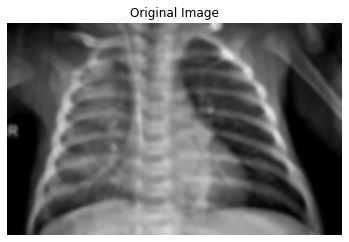

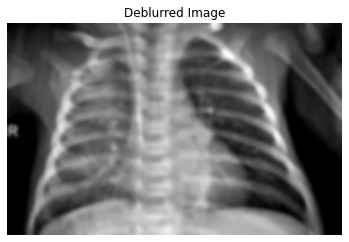

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the blurred image
img = cv2.imread('/content/drive/MyDrive/idb/LRA/sample.jpeg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define the kernel size
kernel_size = 3

# Create the Gaussian kernel
kernel = cv2.getGaussianKernel(kernel_size, 0)

# Create the Wiener filter
wiener = np.zeros((kernel_size, kernel_size), np.float32)
for i in range(kernel_size):
    for j in range(kernel_size):
        wiener[i,j] = kernel[i] * kernel[j] / (kernel[i]**2 + kernel[j]**2)

# Normalize the Wiener filter
wiener = wiener / wiener.sum()

# Apply the Wiener filter to the image
deblurred = cv2.filter2D(gray, -1, wiener)

# Display the results

# cv2_imshow(img)
# cv2_imshow(deblurred)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# display original image
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

# display deblurred image
plt.imshow(deblurred)
plt.title('Deblurred Image')
plt.axis('off')
plt.show()


In [ ]:
# import cv2
# import numpy as np

# # Load the blurred image
# img = cv2.imread('/content/drive/MyDrive/idb/LRA/sample.jpeg')

# # Convert the image to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # Compute the Laplacian of the image
# laplacian = cv2.Laplacian(gray, cv2.CV_64F)

# # Apply the inverse Laplacian filter
# deblurred = cv2.addWeighted(gray, 2, laplacian, -1, 0)

# # Display the deblurred image
# cv2.imshow('Deblurred Image', deblurred)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


error: ignored

<ipython-input-39-eb84c006c69c>:18: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deblurred = restoration.richardson_lucy(color.rgb2gray(img), psf, iterations=30)


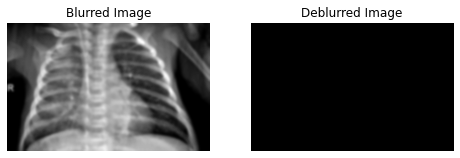

In [ ]:
import numpy as np
from scipy import misc
import cv2
from skimage import color, restoration
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('/content/drive/MyDrive/idb/LRA/sample.jpeg')

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5,5), 0)

# Deblur using Richardson-Lucy algorithm
psf = np.ones((5,5)) / 25
deblurred = restoration.richardson_lucy(color.rgb2gray(img), psf, iterations=30)

# Display images
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
ax1.imshow(blurred, cmap='gray')
ax1.set_title('Blurred Image')
ax1.axis('off')

ax2.imshow(deblurred, cmap='gray', vmin=img.min(), vmax=img.max())
ax2.set_title('Deblurred Image')
ax2.axis('off')

plt.show()
